<a href="https://colab.research.google.com/github/MoiezR/Speech-Emotion-Detection-with-Fuzzy-Output/blob/main/SpeechEmotionRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the necessary modules for Speech Emotion Detection.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/TESS Toronto emotional speech set data'):
  for filename in filenames:
    paths.append(os.path.join(dirname, filename))
    label = filename.split('_')[-1]
    label = label.split(".")[0]
    labels.append(label.lower())
print("Dataset loaded")

Dataset loaded


In [ ]:
df = pd.DataFrame()
df['Speech'] = paths
df['Emotion Label'] = labels
df.head()

,Speech,Emotion Label
0,/content/drive/MyDrive/TESS Toronto emotional ...,fear
1,/content/drive/MyDrive/TESS Toronto emotional ...,fear
2,/content/drive/MyDrive/TESS Toronto emotional ...,fear
3,/content/drive/MyDrive/TESS Toronto emotional ...,fear
4,/content/drive/MyDrive/TESS Toronto emotional ...,fear


In [ ]:
df['Emotion Label'].value_counts()

fear       800
sad        800
neutral    800
disgust    800
ps         800
angry      800
happy      800
Name: Emotion Label, dtype: int64

## Exploring Dataset

In [ ]:
def waveplot(data, sr, emotion):
  plt.figure(figsize=(10,4))
  plt.title(emotion, size=20)
  librosa.display.waveshow(data, sr=sr)
  plt.show()

def spectogram(data, sr, emotion):
  x = librosa.stft(data)
  xdb = librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(11,4))
  plt.title(emotion, size=20)
  librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
  plt.colorbar()

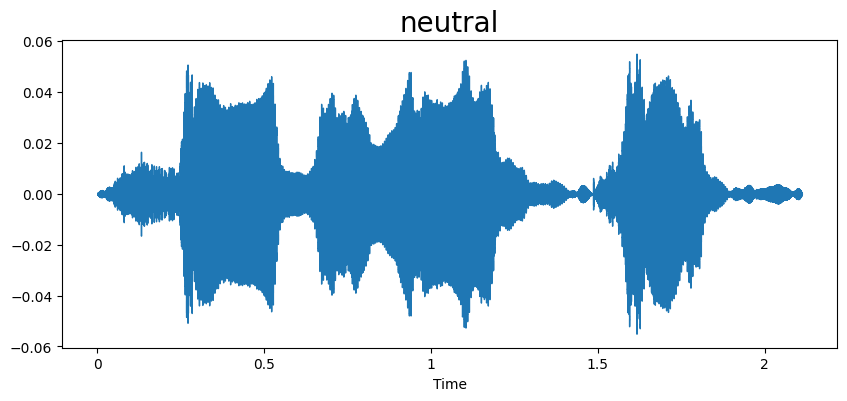

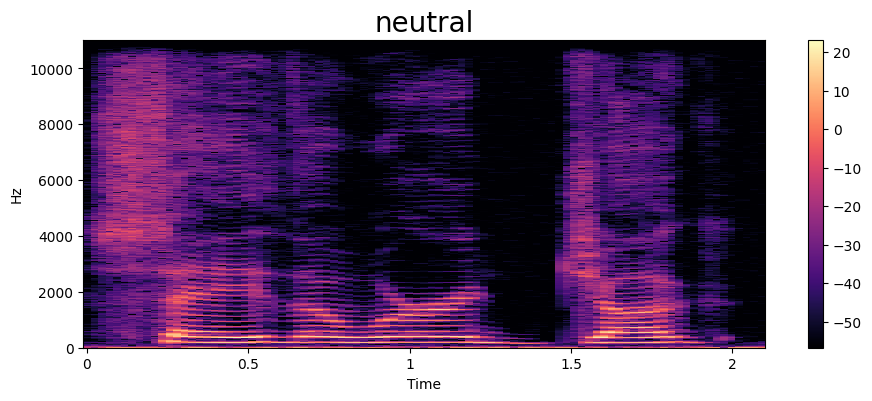

In [ ]:
emotion = 'neutral'
path = np.array(df['Speech'][df['Emotion Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

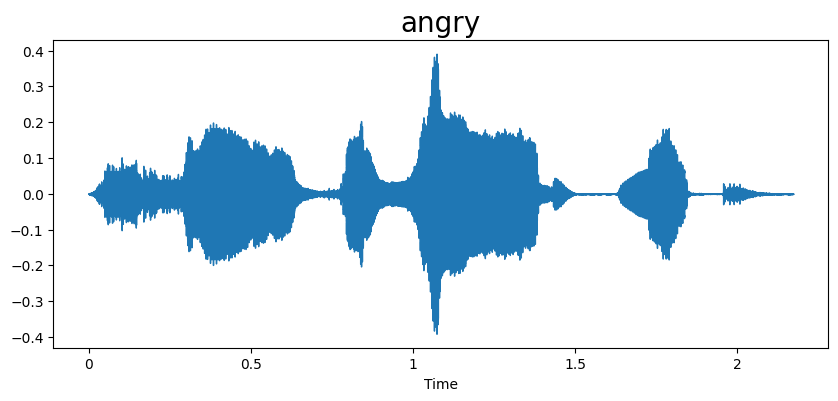

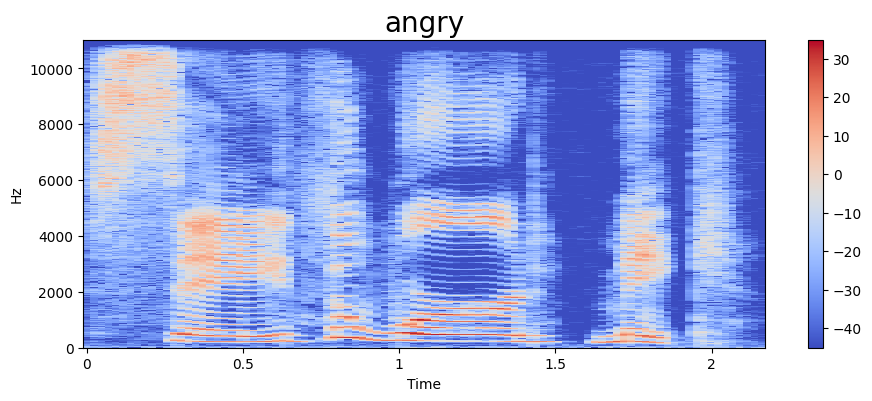

In [ ]:
emotion = 'angry'
path = np.array(df['Speech'][df['Emotion Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

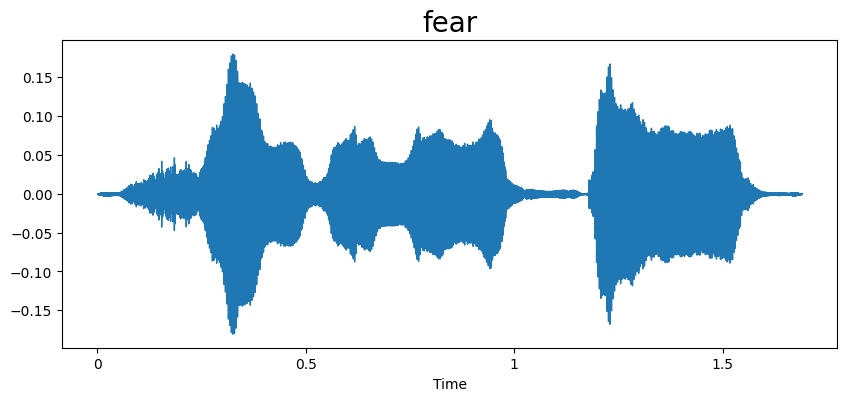

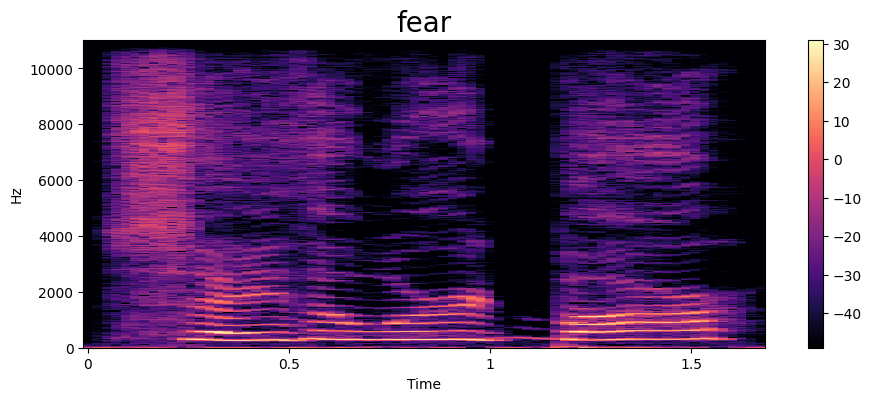

In [ ]:
emotion = 'fear'
path = np.array(df['Speech'][df['Emotion Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

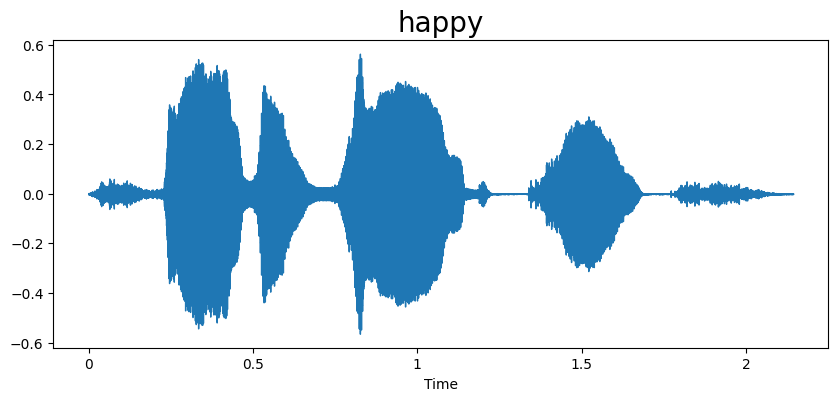

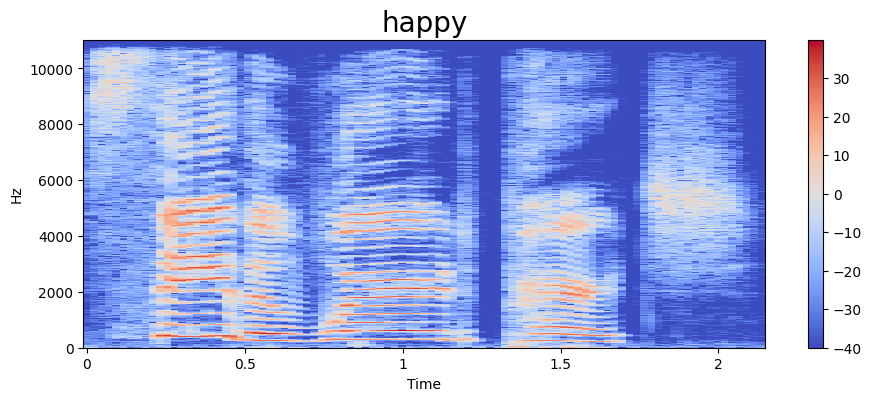

In [ ]:
emotion = 'happy'
path = np.array(df['Speech'][df['Emotion Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

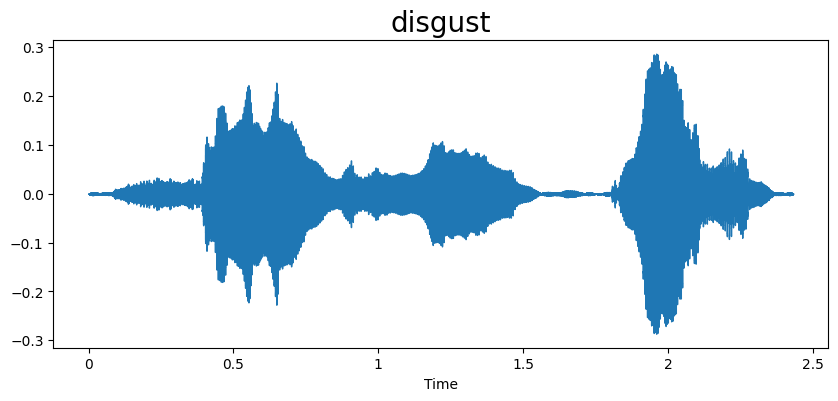

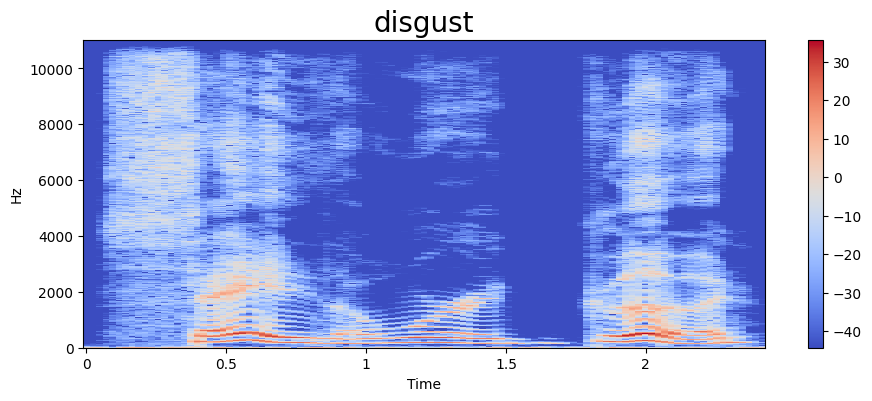

In [ ]:
emotion = 'disgust'
path = np.array(df['Speech'][df['Emotion Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

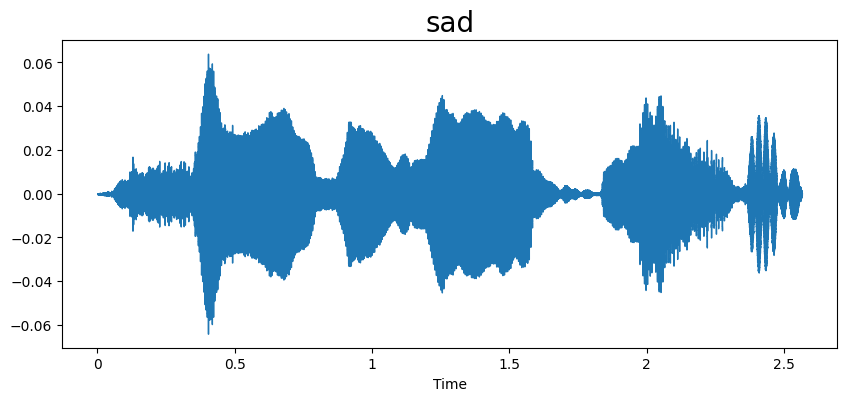

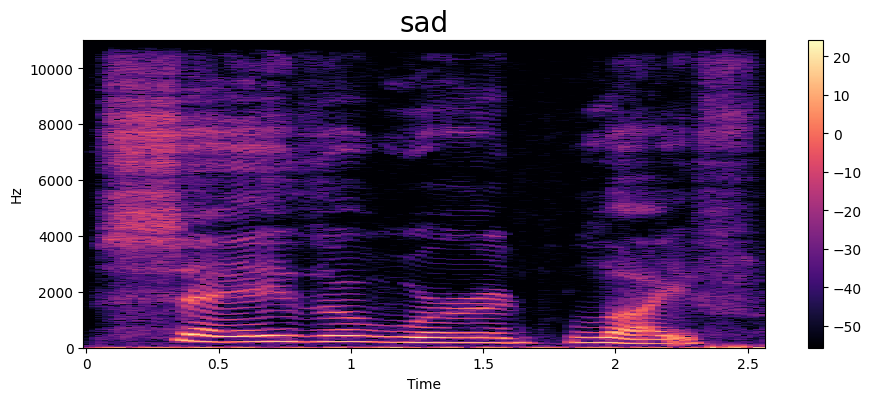

In [ ]:
emotion = 'sad'
path = np.array(df['Speech'][df['Emotion Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

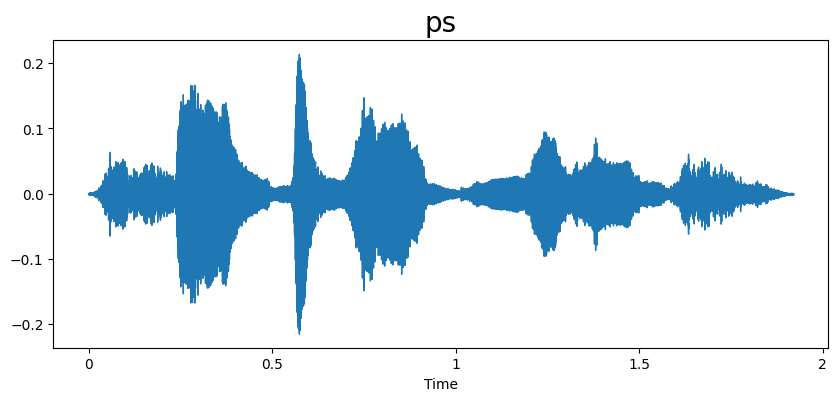

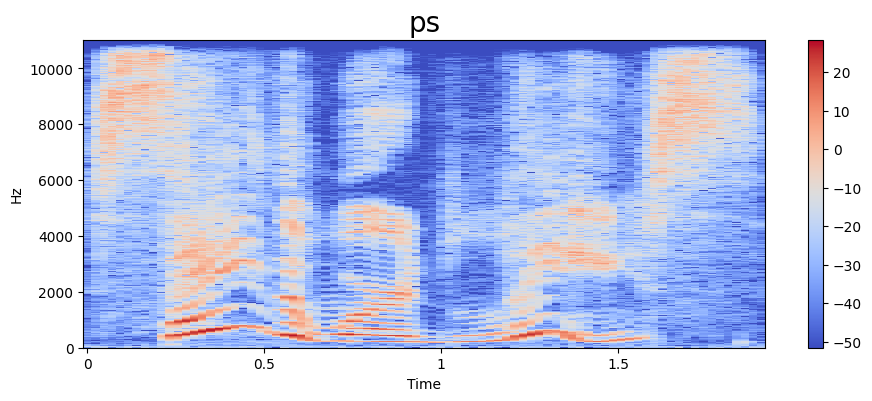

In [ ]:
emotion = 'ps'
path = np.array(df['Speech'][df['Emotion Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Extracting Features

In [ ]:
def extract_mfcc(filename):
  y, sr = librosa.load(filename, duration = 3, offset = 0.5)
  mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
  return mfcc

In [ ]:
extract_mfcc(df['Speech'][0])

array([-4.5629840e+02,  9.5333527e+01,  1.7716850e+01, -3.3765804e+01,
       -1.1817989e+01,  6.5464640e+00, -8.0160379e+00,  1.5736146e+00,
       -1.5325449e+01, -1.1126430e+00, -2.2056816e+01, -4.5272408e+00,
       -6.0576878e+00,  8.0293489e-01, -9.3291006e+00,  5.3060606e-02,
       -2.2767200e+00, -2.5546236e+00,  3.8283560e-01, -5.2236476e+00,
        3.8248408e+00,  2.9024794e+01,  2.4629839e+01,  3.5593071e+01,
        2.9523399e+01,  1.6402748e+01,  1.0630753e+00, -1.0897787e+00,
       -1.6727979e+00,  7.6605387e+00,  4.4564211e-01, -1.5233979e+00,
       -3.0100119e+00, -7.4013338e+00,  1.9788038e+00,  5.0565472e+00,
       -6.7794652e+00, -1.7020785e+00, -2.6077571e+00,  2.6367640e+00],
      dtype=float32)

In [ ]:
X_mfcc = df['Speech'].apply(lambda x: extract_mfcc(x))
print("Features Extracted")

Features Extracted


In [ ]:
X_mfcc

0       [-456.2984, 95.33353, 17.71685, -33.765804, -1...
1       [-445.36737, 91.2761, -0.5894925, -17.314266, ...
2       [-483.49344, 111.59739, 23.837387, -36.052895,...
3       [-495.35794, 93.90239, 25.65995, -16.774738, -...
4       [-500.6967, 90.146454, 24.972002, -9.280767, -...
                              ...                        
5595    [-467.13086, 90.74654, 32.921684, -7.383644, 3...
5596    [-477.0122, 100.80709, 24.681585, -17.87858, 1...
5597    [-481.67386, 124.97996, 28.451313, -9.773115, ...
5598    [-457.3927, 96.427505, 8.597266, -17.167791, 4...
5599    [-450.5133, 82.81387, 22.266666, 1.4602195, 11...
Name: Speech, Length: 5600, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [ ]:
#Splitting the input
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['Emotion Label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(5600, 7)

## Creating the LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='linear')
])

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71747 (280.26 KB)
Trainable params: 71747 

In [ ]:
history=model.fit(X,y,validation_split=0.2,epochs=100,batch_size=512,shuffle=True)

Epoch 1/100
9/9 [==============================] - 7s 133ms/step - loss: 0.1489 - mean_squared_error: 0.1489 - val_loss: 0.1315 - val_mean_squared_error: 0.1315
Epoch 2/100
9/9 [==============================] - 0s 16ms/step - loss: 0.1086 - mean_squared_error: 0.1086 - val_loss: 0.1180 - val_mean_squared_error: 0.1180
Epoch 3/100
9/9 [==============================] - 0s 24ms/step - loss: 0.0936 - mean_squared_error: 0.0936 - val_loss: 0.1135 - val_mean_squared_error: 0.1135
Epoch 4/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0853 - mean_squared_error: 0.0853 - val_loss: 0.1028 - val_mean_squared_error: 0.1028
Epoch 5/100
9/9 [==============================] - 0s 28ms/step - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.0959 - val_mean_squared_error: 0.0959
Epoch 6/100
9/9 [==============================] - 0s 32ms/step - loss: 0.0717 - mean_squared_error: 0.0717 - val_loss: 0.0908 - val_mean_squared_error: 0.0908
Epoch 7/100
9/9 [======================

### Results

In [ ]:
probs = model.predict(X)

for i in range(len(probs)):
    plt.figure()
    plt.bar(range(len(probs[0])), probs[i])
    plt.xlabel('Classes')
    plt.ylabel('Probability')
    plt.title(f'Probabilities for Sample {i}')
    plt.show()